In [1]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = load_diabetes()

In [16]:
X = data.data
y = data.target

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [18]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()
L.fit(X_train, y_train)
print(L.coef_)
print(L.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [19]:
y_pred = L.predict(X_test)

In [20]:
from sklearn.metrics import r2_score, mean_squared_error

print("R2 score", r2_score(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953253


In [21]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.0001)
R.fit(X_train, y_train)
print(R.coef_)
print(R.intercept_)

[  23.51763492 -247.31766656  492.28244914  329.3317593  -957.46324421
  562.90310325  176.71070198  254.47033329  789.10867561   89.41375823]
152.13492030963658


In [22]:
y_pred1 = R.predict(X_test)
print("R2 score", r2_score(y_test, y_pred1))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred1)))

R2 score 0.5189732635884962
RMSE 48.7189370018195


<function matplotlib.pyplot.show(close=None, block=None)>

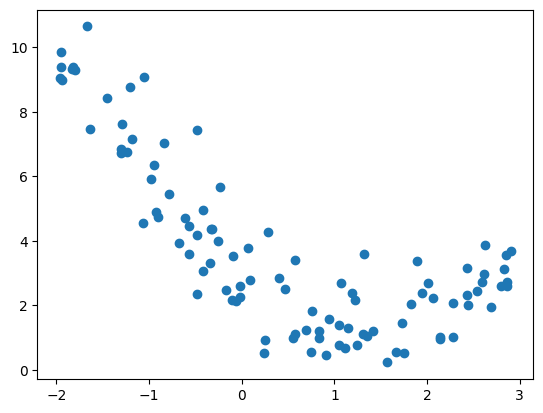

In [23]:
m = 100
x1 = 5*np.random.rand(m,1) - 2       # rand(m,1) this mean 100 rows and 1 col. range [0,1)
x2 = 0.7 * x1 ** 2 - 2*x1 + 3 +np.random.randn(m,1)  #sAME AS above but range (-infi, infi)

plt.scatter(x1,x2)
plt.show

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)

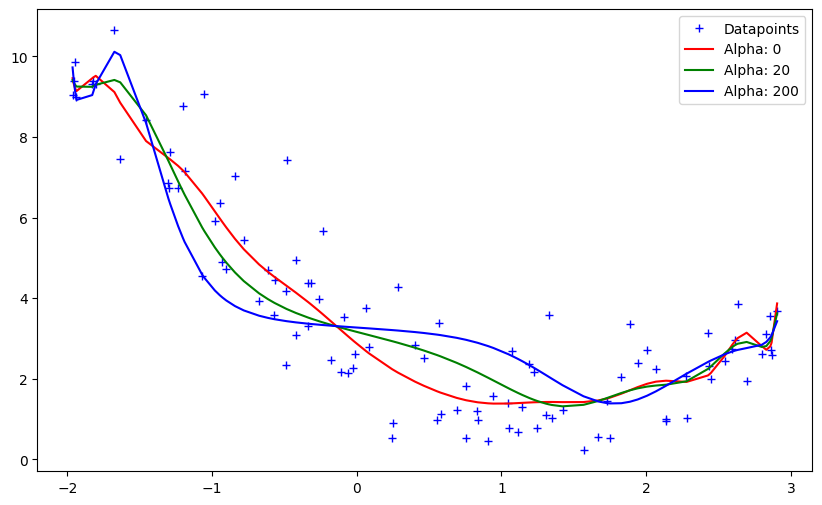

In [28]:
alphas = [0,20,200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10,6))
plt.plot(x1, x2, 'b+', label="Datapoints")

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)

    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:,0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()